In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.model.data import __version__

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from src.base import logger
from src.config import get_config, init_config_file
from src.model.data import make_dataset
from src.model.features import build_features
from src.model.preprocessing import PreProcessor

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

#from xgboost import XGBClassifier


pd.options.display.max_columns = None

%config IPCompleter.use_jedi=False

In [2]:
data_config = get_config(filename="config/model.yaml")

features_config = get_config(filename="config/features.yaml")

X,y  = make_dataset(data_config, download_bases=False)

X,y = build_features(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

preprocessor = PreProcessor(features_config)

preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)

X_test = preprocessor.transform(X_test)

classifier = RandomForestClassifier(n_estimators=110, random_state=42)

classifier.fit(X_train, y_train)

f1_score(y_test,classifier.predict(X_test), average = 'weighted')

0.5732844574780058

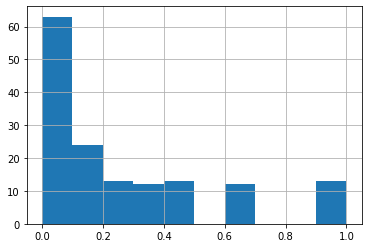

In [50]:
X_train['Na_to_K'].hist()
plt.show()